In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%config Completer.use_jedi = False

## Bài tập 3: 
- Cho tập tin iris.csv, đọc dữ liệu ra dataframe và chỉ lấy 4 cột đầu
- Từ datafarme, sử dụng SVD bằng công thức để giảm chiều dữ liệu chỉ còn 2 component
- Trực quan hóa dữ liệu sau khi giảm chiều, có cả cột species

In [2]:
iris = pd.read_csv("data/iris.csv")
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
# Decomposition
U, s, VT = np.linalg.svd(X)

In [4]:
U

array([[-6.16171172e-02,  1.29969428e-01, -5.58364155e-05, ...,
        -9.34637342e-02, -9.60224157e-02, -8.09922905e-02],
       [-5.80722977e-02,  1.11371452e-01,  6.84386629e-02, ...,
         3.66755322e-02, -3.24463474e-02,  1.27273399e-02],
       [-5.67633852e-02,  1.18294769e-01,  2.31062793e-03, ...,
         3.08252776e-02,  1.95234663e-01,  1.35567696e-01],
       ...,
       [-9.40702260e-02, -4.98348018e-02, -4.14958083e-02, ...,
         9.81822841e-01, -2.17978813e-02, -8.85972146e-03],
       [-9.48993908e-02, -5.62107520e-02, -2.12386574e-01, ...,
        -2.14264126e-02,  9.42038920e-01, -2.96933496e-02],
       [-8.84882764e-02, -5.16210172e-02, -9.51442925e-02, ...,
        -8.52768485e-03, -3.02139863e-02,  9.73577349e-01]])

In [5]:
s

array([95.95066751, 17.72295328,  3.46929666,  1.87891236])

In [6]:
VT

array([[-0.75116805, -0.37978837, -0.51315094, -0.16787934],
       [ 0.28583096,  0.54488976, -0.70889874, -0.34475845],
       [ 0.49942378, -0.67502499, -0.05471983, -0.54029889],
       [ 0.32345496, -0.32124324, -0.48077482,  0.74902286]])

In [7]:
Sigma = np.zeros((X.shape[0],X.shape[1]))
Sigma[:X.shape[1],:X.shape[1]]= np.diag(s)
Sigma

array([[95.95066751,  0.        ,  0.        ,  0.        ],
       [ 0.        , 17.72295328,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.46929666,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.87891236],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.

In [8]:
n_elements = 2
Sigma = Sigma[:,:n_elements]
VT = VT[:n_elements,:]

In [9]:
B=U.dot(Sigma.dot(VT))
B

array([[5.09945346, 3.50050812, 1.40094556, 0.19840569],
       [4.74974728, 3.19172985, 1.46006954, 0.25494146],
       [4.69047924, 3.2108907 , 1.30863935, 0.1915549 ],
       [4.61834831, 3.08439659, 1.46266616, 0.26731753],
       [5.07896131, 3.5005194 , 1.36352353, 0.18323972],
       [5.5300156 , 3.7270409 , 1.67511126, 0.28560814],
       [4.73513024, 3.22346842, 1.36171979, 0.21173807],
       [5.0090388 , 3.3931523 , 1.47838624, 0.24111369],
       [4.38266777, 2.92709982, 1.38778914, 0.25356965],
       [4.80937785, 3.22911564, 1.48446275, 0.26088223],
       [5.39972928, 3.70190802, 1.49410632, 0.21490986],
       [4.89813198, 3.28580776, 1.5184049 , 0.26865573],
       [4.68239571, 3.1600364 , 1.40873117, 0.23748098],
       [4.3045681 , 2.99693565, 1.08755409, 0.12453562],
       [5.73556855, 4.0680786 , 1.28006801, 0.08954214],
       [5.90774958, 4.11819888, 1.48109876, 0.16571941],
       [5.45688065, 3.80359406, 1.36876673, 0.15338963],
       [5.10220976, 3.48809845,

In [10]:
T = U.dot(Sigma)
T

array([[-5.91220352e+00,  2.30344211e+00],
       [-5.57207573e+00,  1.97383104e+00],
       [-5.44648470e+00,  2.09653267e+00],
       [-5.43601924e+00,  1.87168085e+00],
       [-5.87506555e+00,  2.32934799e+00],
       [-6.47699043e+00,  2.32552598e+00],
       [-5.51542859e+00,  2.07156181e+00],
       [-5.85042297e+00,  2.14948016e+00],
       [-5.15851287e+00,  1.77642658e+00],
       [-5.64458172e+00,  1.99190598e+00],
       [-6.26482670e+00,  2.42727947e+00],
       [-5.75150446e+00,  2.02142409e+00],
       [-5.48017099e+00,  1.97972378e+00],
       [-4.95064168e+00,  2.04947793e+00],
       [-6.52528515e+00,  2.91774840e+00],
       [-6.78960484e+00,  2.82549990e+00],
       [-6.27173006e+00,  2.60908548e+00],
       [-5.92899145e+00,  2.26896626e+00],
       [-6.64757408e+00,  2.39126214e+00],
       [-6.09424306e+00,  2.36154331e+00],
       [-6.25352038e+00,  2.12203279e+00],
       [-6.07305216e+00,  2.27257849e+00],
       [-5.36933796e+00,  2.49857510e+00],
       [-6.

In [11]:
T= X.dot(VT.T)
T

,0,1
0,-5.912204,2.303442
1,-5.572076,1.973831
2,-5.446485,2.096533
3,-5.436019,1.871681
4,-5.875066,2.329348
...,...,...
145,-9.226698,-0.929481
146,-8.566555,-1.036575
147,-9.026101,-0.883220
148,-9.105660,-0.996221


In [12]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
T.columns = ['Comp1','Comp2']
T['species'] = iris['species']
T

,Comp1,Comp2,species
0,-5.912204,2.303442,setosa
1,-5.572076,1.973831,setosa
2,-5.446485,2.096533,setosa
3,-5.436019,1.871681,setosa
4,-5.875066,2.329348,setosa
...,...,...,...
145,-9.226698,-0.929481,virginica
146,-8.566555,-1.036575,virginica
147,-9.026101,-0.883220,virginica
148,-9.105660,-0.996221,virginica


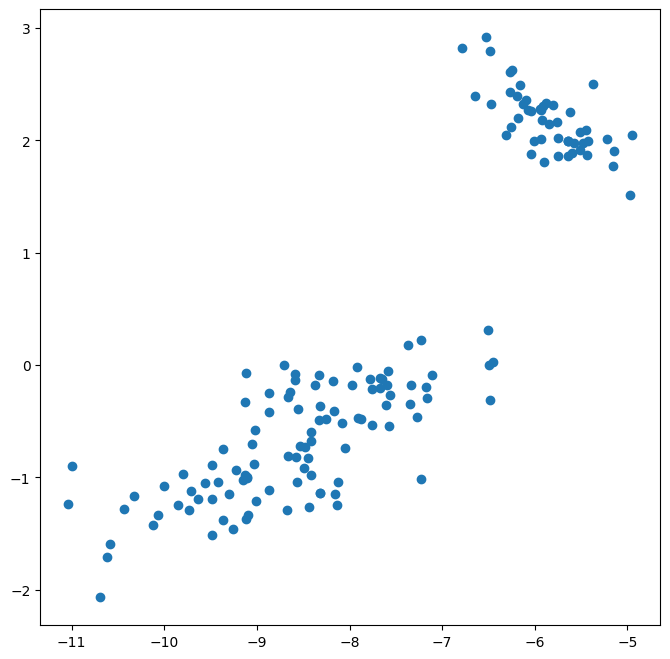

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(T['Comp1'],T['Comp2'])

<AxesSubplot: xlabel='Comp1', ylabel='Comp2'>

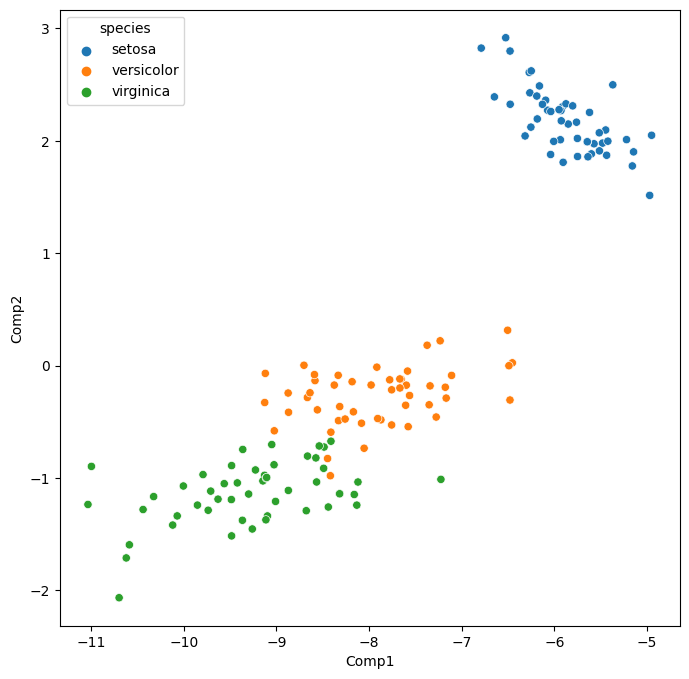

In [24]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = T,x = T['Comp1'], y = T['Comp2'], hue ='species')